In [165]:
# Imports.
import math
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches # For graph colours
import statsmodels.formula.api as sm # for training a linear regression model.
import seaborn as sns # For making correlation matrices
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # for making confusion martrices Note: Not needed.
from sklearn.metrics import accuracy_score # Prediction accuracy: (tp + tn) / total
from sklearn.metrics import precision_score # Computing precision: tp / (tp + fp)
from sklearn.metrics import recall_score # Recall Score: tp / (tp + fn)
from sklearn.metrics import f1_score # F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

#For showing plots directly in the notebook run the command below
%matplotlib inline
%config IPCompleter.greedy=True

# Prevents tables from being truncated.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [166]:
# Read csv file into a dataframe.
df = pd.read_csv('train.csv')

In [167]:
df.shape

(1460, 81)

In [168]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [169]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [170]:
df.select_dtypes(['object']).describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [171]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


By preliminary analysis:<br>
 - if features are of data type float or int, put them in a list called "continuous_features". 
 - If they are of data type object, convert them to categorical and put them in a list called "categorical_features".
 - The **Id** column has doesn't contain any useful information. Therefore, we dropped it here.

In [172]:
# Id is the index of the dataset, doesn't contain any useful information. Therefore, we dropped it here.
df = df.drop('Id',axis=1)

In [173]:
# Convert features of type 'object' to type 'category'
for column in df.select_dtypes(['object']).columns:
    df[column] = df[column].astype('category')

# Make list of categorical columns
categorical_features = df.select_dtypes(['category']).columns.tolist()

# Make list of continuous columns
continuous_features = df.select_dtypes(['int', 'float64']).columns.tolist()

In [174]:
# Number of features
print("Total number of features: ", len(df.columns))
print("Number of continuous: ", len(continuous_features))
print("Number of categorical: ", len(categorical_features))

Total number of features:  80
Number of continuous:  37
Number of categorical:  43


In [175]:
# Finiding duplicates:
print("Duplicate columns: ")
print(df.columns.size - df.columns.unique().size)

print("Duplicate rows:")
print(df.duplicated()[df.duplicated() == True].shape[0])

Duplicate columns: 
0
Duplicate rows:
0


In [176]:
# Checking for constant columns

# Print count of unique values for 'continuous_column'
print("\n-Continuous Columns-\n")
print("{0:30}{1:<15}".format("Feature", "UniqueValues"))
for column in continuous_features:
    print("{0:30}{1:<15}".format(column, len(df[column].unique())))
    
print("\n-Categorical Columns-\n")
print("{0:30}{1:<15}".format("Feature", "UniqueValues"))

# Print count of unique values for 'categorical_columns'
for column in categorical_features:
    print("{0:30}{1:<15}".format(column, len(df[column].unique())))


-Continuous Columns-

Feature                       UniqueValues   
MSSubClass                    15             
LotFrontage                   111            
LotArea                       1073           
OverallQual                   10             
OverallCond                   9              
YearBuilt                     112            
YearRemodAdd                  61             
MasVnrArea                    328            
BsmtFinSF1                    637            
BsmtFinSF2                    144            
BsmtUnfSF                     780            
TotalBsmtSF                   721            
1stFlrSF                      753            
2ndFlrSF                      417            
LowQualFinSF                  24             
GrLivArea                     861            
BsmtFullBath                  4              
BsmtHalfBath                  3              
FullBath                      4              
HalfBath                      3              
BedroomAbvG

In [177]:
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


No constant columns in dataset. However, the continuous feature list does contain a number of features with low numbers of unique values.

In [178]:
# Features in the continuous list with low counts
low_count_continuous = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MiscVal',
                        'MoSold', 'YrSold']

for column in low_count_continuous:
    print("{0:20} {1}".format(column, pd.unique(df[column].ravel())))

MSSubClass           [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual          [ 7  6  8  5  9  4 10  3  1  2]
OverallCond          [5 8 6 7 4 2 3 9 1]
BsmtFullBath         [1 0 2 3]
BsmtHalfBath         [0 1 2]
FullBath             [2 1 3 0]
HalfBath             [1 0 2]
BedroomAbvGr         [3 4 1 2 0 5 6 8]
KitchenAbvGr         [1 2 3 0]
TotRmsAbvGrd         [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces           [0 1 2 3]
GarageCars           [2 3 1 0 4]
PoolArea             [  0 512 648 576 555 480 519 738]
MiscVal              [    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]
MoSold               [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold               [2008 2007 2006 2009 2010]


Most of these values are continuous but low value. 

- **MSSubClass** (Nominal): Identifies the type of dwelling involved in the sale.	

```
020	1-STORY 1946 & NEWER ALL STYLES
030	1-STORY 1945 & OLDER
040	1-STORY W/FINISHED ATTIC ALL AGES
045	1-1/2 STORY - UNFINISHED ALL AGES
050	1-1/2 STORY FINISHED ALL AGES
060	2-STORY 1946 & NEWER
070	2-STORY 1945 & OLDER
075	2-1/2 STORY ALL AGES
080	SPLIT OR MULTI-LEVEL
085	SPLIT FOYER
090	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES
```
- **MoSold** means Month Sold. Month sold is a finite set of values that contains twelve possiblities, therefore it is a categorical feature.

- **OverallQual** means overall quality. OverallQual is a finite set of values that contains ten possiblities, therefore it is a categorical feature.

- **OverallCond** means overall condition. OverallCond is a finite set of values that contains nine possiblities, therefore it is a categorical feature.

Conclusion:<br> **MSSubClass, MoSold, OverallQual** and **OverallCond** should be removed from the continuous features.

In [179]:
# Remove from continuous list
remove_from_continuous = ['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond']
continuous_features = [x for x in continuous_features if x not in remove_from_continuous]

In [180]:
# Add to categorical
categorical_features.extend(remove_from_continuous)

# 2 - Initial Findings

## Continuous Features

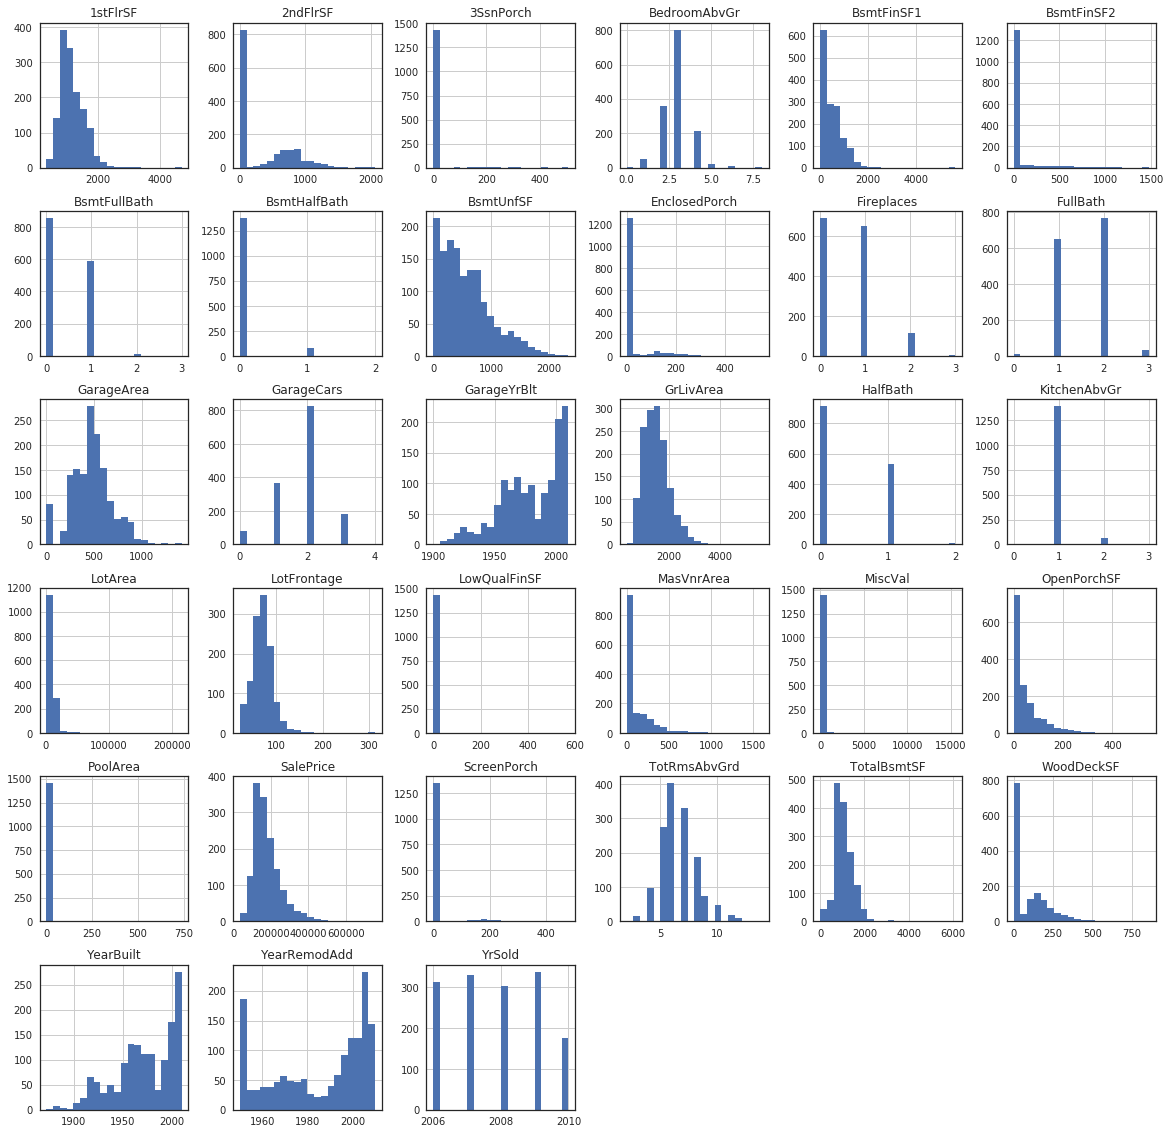

In [181]:
# Plot a histogram of the continuous features.
df[continuous_features].hist(figsize=(20,20), bins=20)
plt.show()

Several features have a huge count of a single value and a very small number of other values. These features may have to be excluded from the dataset. Features of note in this regard are:

* 3SsnPorch
* BsmtFinSF2
* BsmtHalfBath
* EnclosedPorch
* KitchenAbvGr
* LowQualFinSF
* MiscVal
* PoolArea
* ScreenPorch

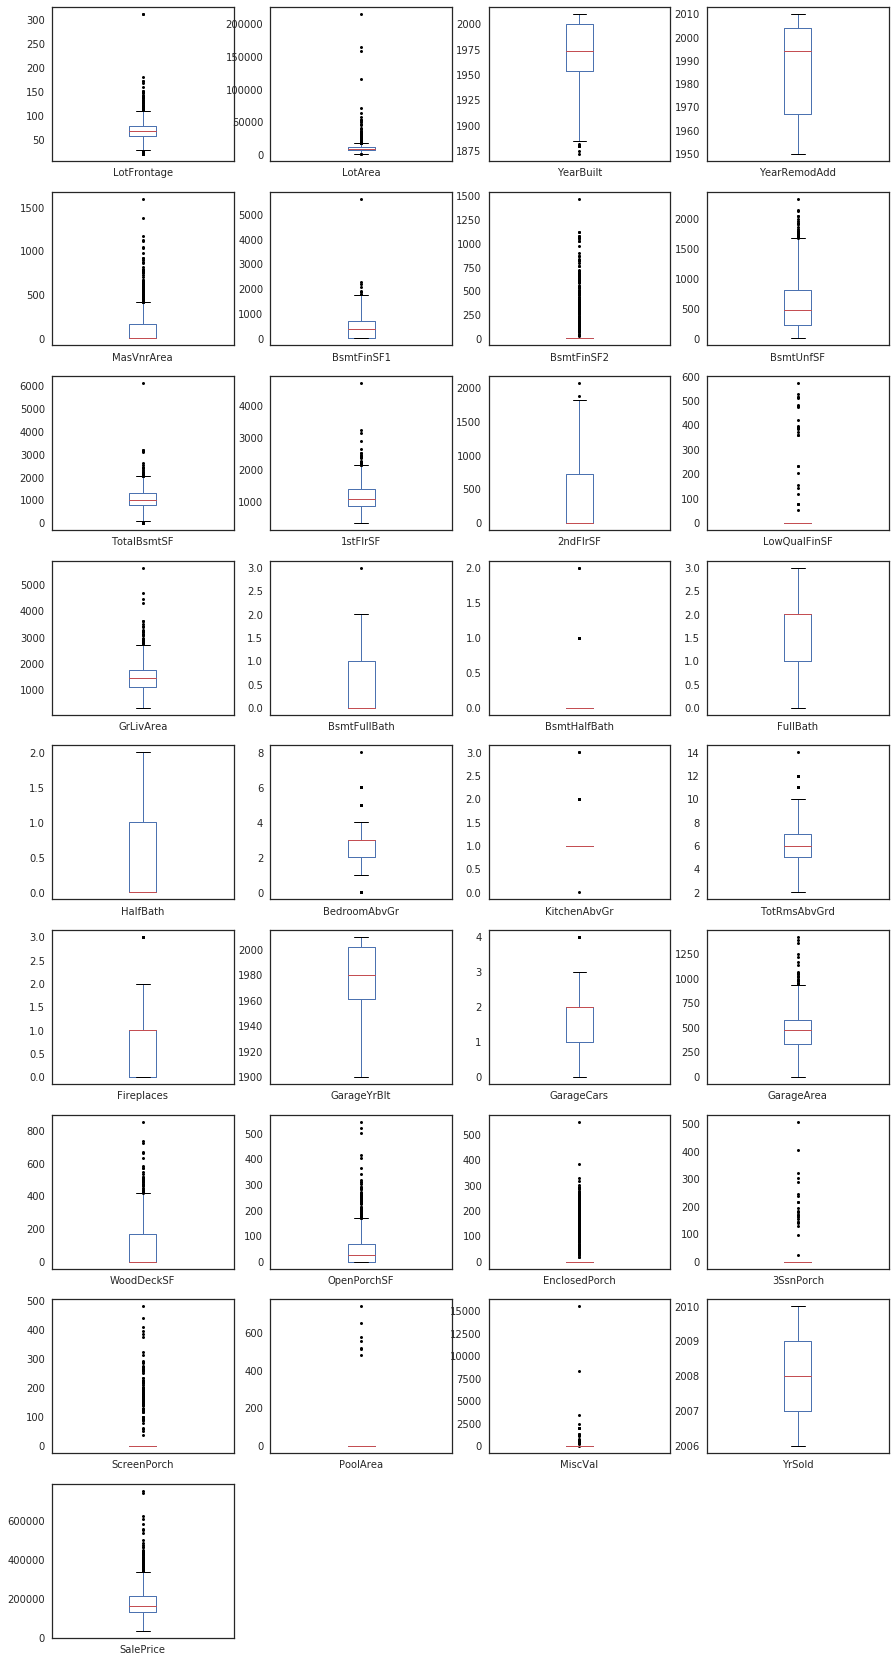

In [182]:
# Plot box plots for all the continuous features
# Note: seaborn combined with matplotlib hide fliers (outliers). To avoid this, add sym="k." to the parameters
df[continuous_features].plot(kind='box', figsize=(15,30), subplots=True, layout=(9,4), sym="k.")
plt.show()

A few features appear to have extreme outliers that may have to be examined. These include:

* LotFrontage
* LotArea
* BsmtFinSF1
* TotalBsmtSF
* 1stFlrSF
* BsmtFullBath
* KitchenAbvGr
* EnclosedPorch
* PoolArea
* MiscVal

## Outliers

The following are the biggest ten values of the features identified to have outliers above:

In [183]:
# Searching for outliers - Upper tail
outliers = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'BsmtFullBath', 'KitchenAbvGr', 
            'EnclosedPorch', 'PoolArea', 'MiscVal']

# Code Source: Stackexchange - Zelazny7
# https://stackoverflow.com/questions/20477190/get-top-biggest-values-from-each-column-of-the-pandas-dataframe
def sorted(s, num):
    tmp = s.sort_values(ascending=False)[:num]  # earlier s.order(..)
    tmp.index = range(num)
    return tmp

df[outliers].apply(lambda x: sorted(x, 10)).T.round(2)

,0,1,2,3,4,5,6,7,8,9
LotFrontage,313.0,313.0,182.0,174.0,174.0,168.0,160.0,153.0,152.0,150.0
LotArea,215245.0,164660.0,159000.0,115149.0,70761.0,63887.0,57200.0,53504.0,53227.0,53107.0
BsmtFinSF1,5644.0,2260.0,2188.0,2096.0,1904.0,1880.0,1810.0,1767.0,1721.0,1696.0
TotalBsmtSF,6110.0,3206.0,3200.0,3138.0,3094.0,2633.0,2524.0,2444.0,2396.0,2392.0
1stFlrSF,4692.0,3228.0,3138.0,2898.0,2633.0,2524.0,2515.0,2444.0,2411.0,2402.0
BsmtFullBath,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
KitchenAbvGr,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
EnclosedPorch,552.0,386.0,330.0,318.0,301.0,294.0,293.0,291.0,286.0,280.0
PoolArea,738.0,648.0,576.0,555.0,519.0,512.0,480.0,0.0,0.0,0.0
MiscVal,15500.0,8300.0,3500.0,2500.0,2000.0,2000.0,2000.0,2000.0,1400.0,1300.0


In [184]:
print("\nContinuous Features with outliers > 1.5 * upper 3rd quartile:\n")

print("{0:20} {1}".format('feaure', 'Max Value'))
print("-"*50)

for i in outliers:
    if df[i].max() > (df[i].quantile(.75) * 1.5):
        print("{0:20} {1}".format(i, df[i].max()))


Continuous Features with outliers > 1.5 * upper 3rd quartile:

feaure               Max Value
--------------------------------------------------
LotFrontage          313.0
LotArea              215245
BsmtFinSF1           5644
TotalBsmtSF          6110
1stFlrSF             4692
BsmtFullBath         3
KitchenAbvGr         3
EnclosedPorch        552
PoolArea             738
MiscVal              15500


## Categorical Features

In [185]:
# Unique values in categorical_columns
print("\nCategorical columns unique values:")
print("-"*100)

for column in categorical_features:
    print("{0:20} {1}".format(column, pd.unique(df[column].ravel())))


Categorical columns unique values:
----------------------------------------------------------------------------------------------------
MSZoning             ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street               ['Pave' 'Grvl']
Alley                [nan 'Grvl' 'Pave']
LotShape             ['Reg' 'IR1' 'IR2' 'IR3']
LandContour          ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities            ['AllPub' 'NoSeWa']
LotConfig            ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope            ['Gtl' 'Mod' 'Sev']
Neighborhood         ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1           ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2           ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType             ['1Fam' '2fmCon' 'Duplex' 'TwnhsE'

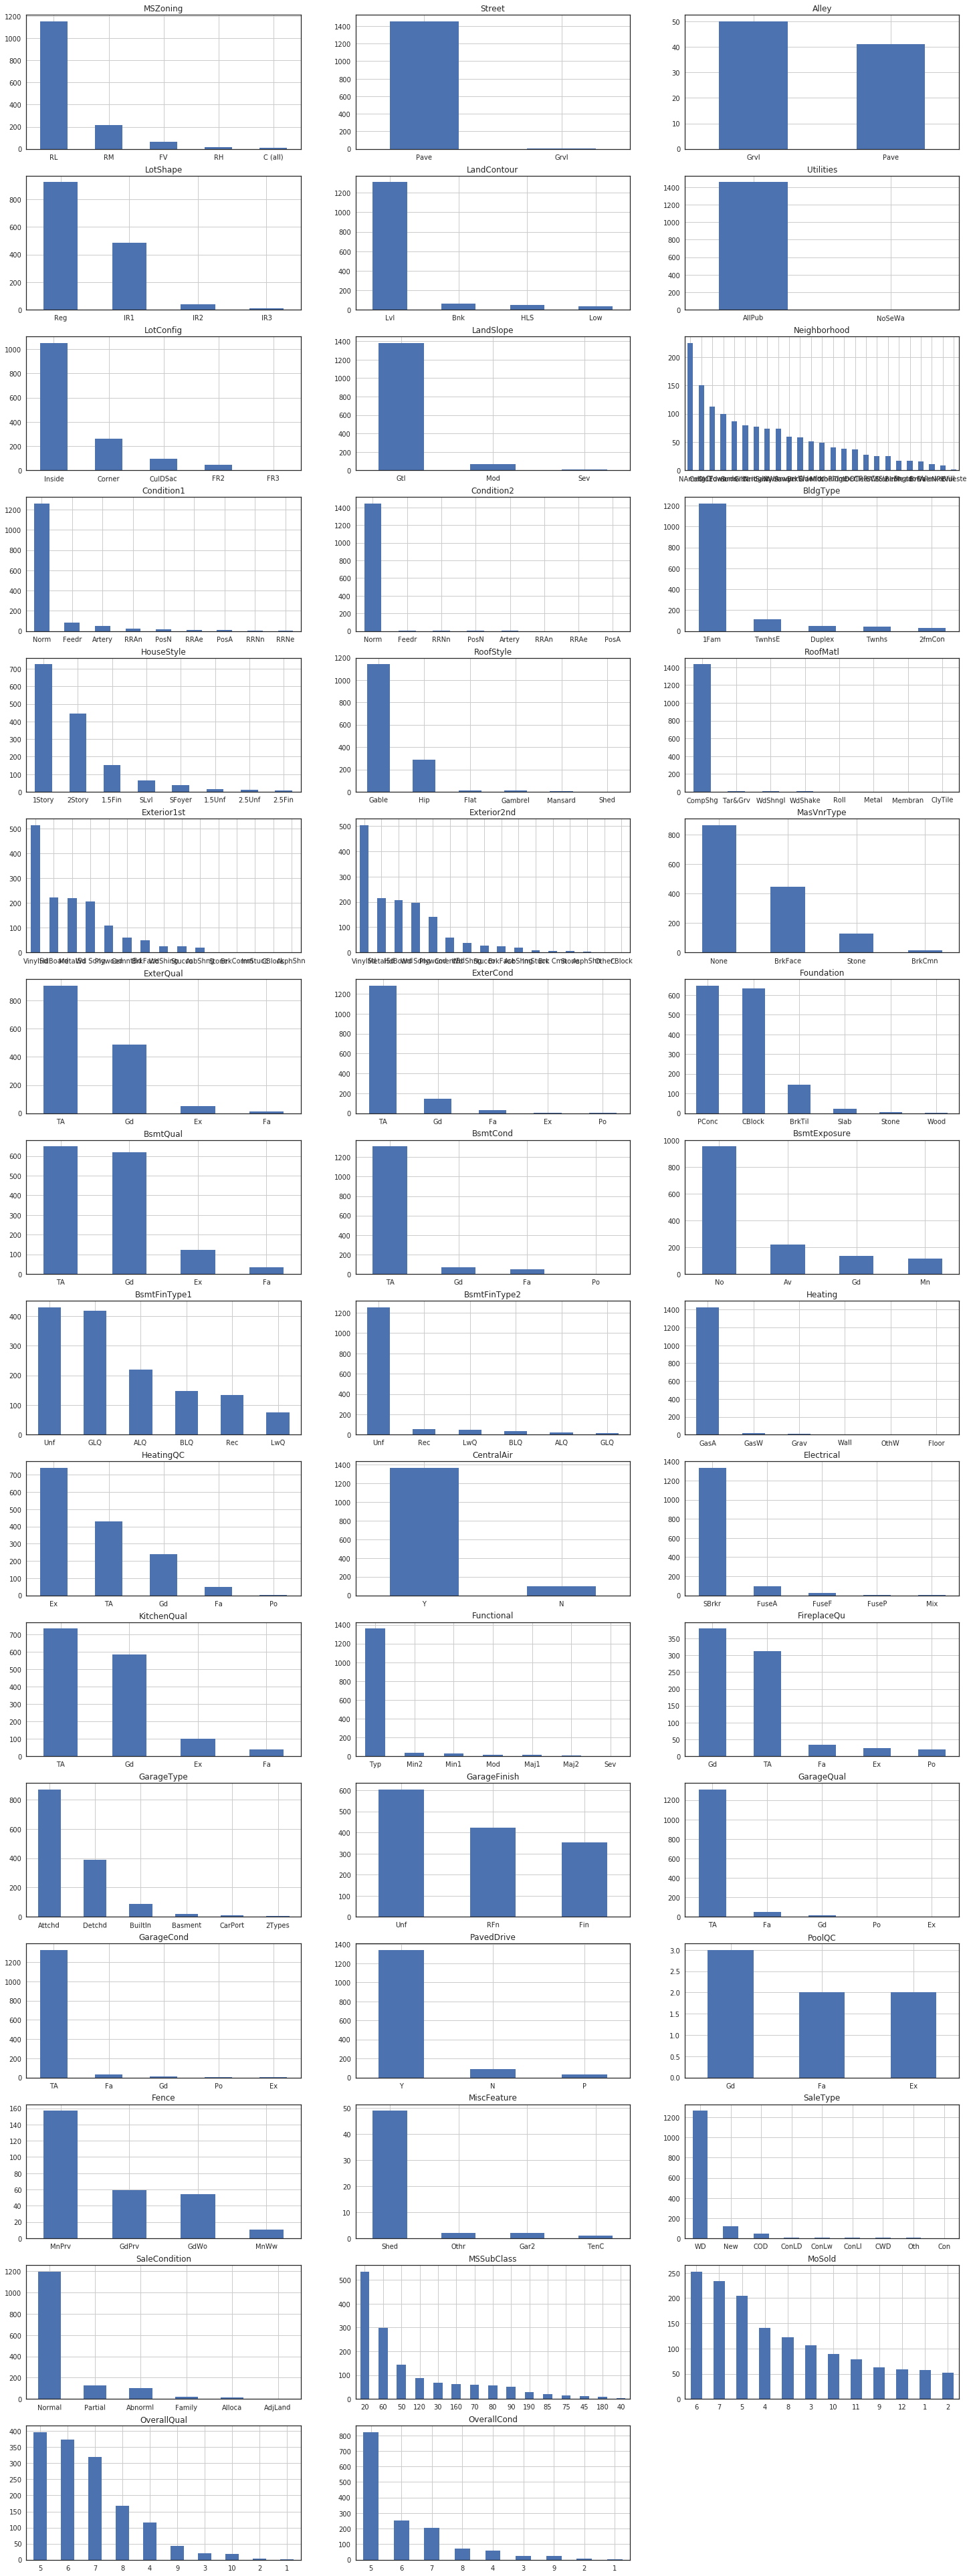

In [186]:
# Plot bar plots for all the categorical features
# Shape of categorical datasets is as follows:
fig, axes = plt.subplots(nrows=16, ncols=3, figsize=(25,70))
fig.subplots_adjust(hspace = 0.2)

axes_list = [item for sublist in axes for item in sublist]

for feature in categorical_features:
    ax = axes_list.pop(0)
    df[feature].value_counts().plot(kind='bar', ax=ax, grid=True, rot=1)
    ax.set_title(feature)

for ax in axes_list:
    ax.remove()

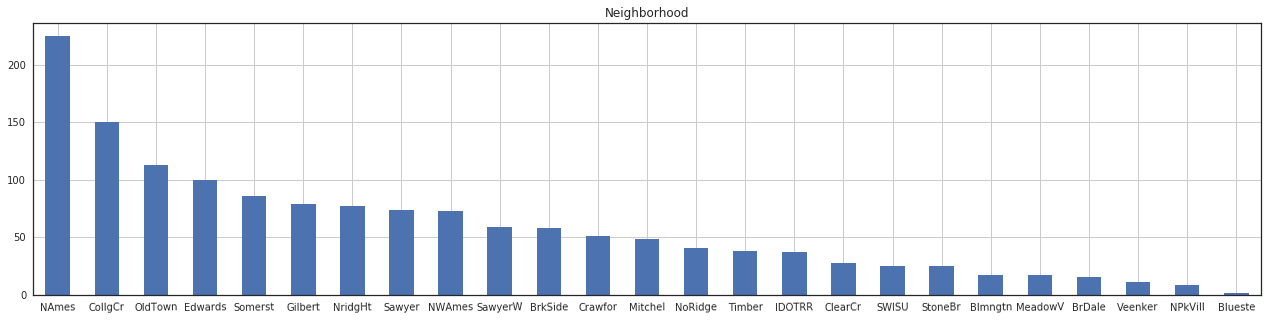

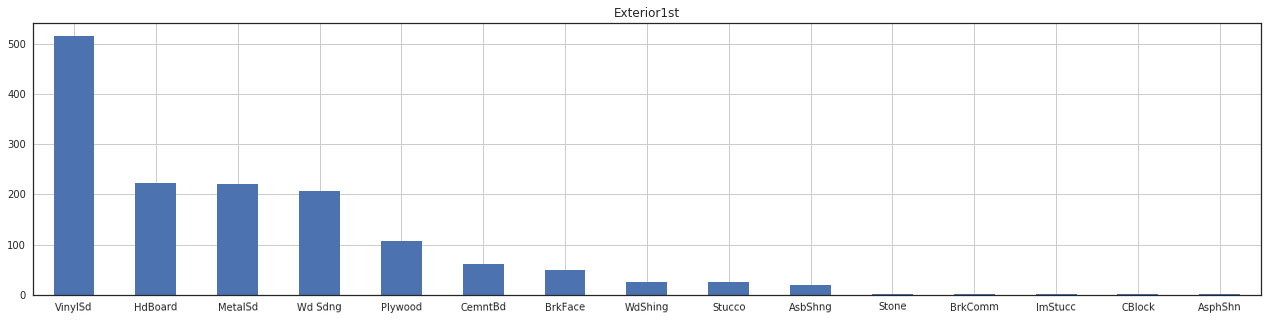

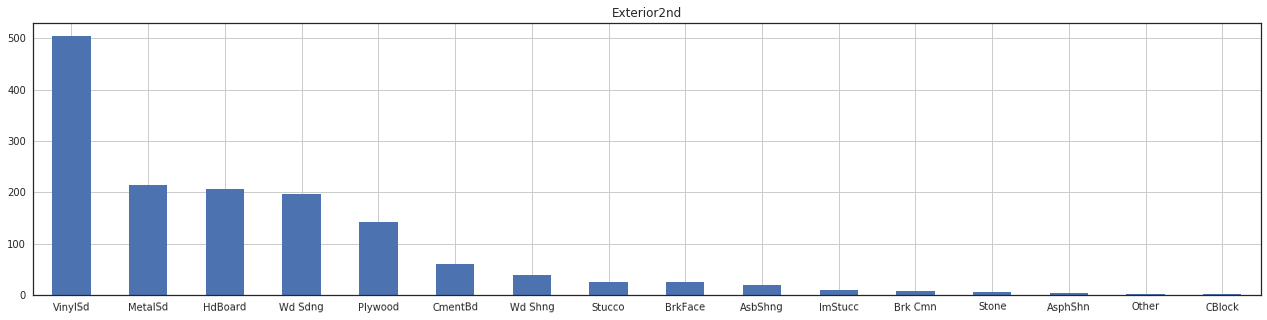

In [187]:
# The X axis labels on three of the above are hard to make out:
bigger_barcharts = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for feature in bigger_barcharts:
    df[feature].value_counts().plot(kind='bar', grid=True, rot=1, title=feature, figsize=(22,5))
    plt.show()

#### Low levels of variance

The following features had a very large number of a particular value and a very small number of other values:

```
['Street', 'LandContour', 'Utilities', 'LandSlope', 'RoofMatl', 'ExterCond', 'BsmtCond', 
 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 
 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
```
#### Duplicate features?

What is the difference between the following features?
* Street & Ally  
_**Answer:** Street is the type of road access while Alley is the type of alley access._

* Condition1 & Condition2  
_**Answer:** Condition1 is the proximity to main road or railroad Condition2 is proximity to a 2nd main road or railroad (if there is more than one nearby)_

* Exterior1st & Exterior2nd  
_**Answer:** Exterior1st is the exterior covering on house, while Exterior2nd is the 2nd exterior covering on house (if more than one material)_

* BsmtFinType1 & BsmtFinType2  
_**Answer:** BsmtFinType1 is the quality of basement finished area, while BsmtFinType2 is the quality of second finished area (if present)._

* BsmtFinSF, BsmtFinSF1 & BsmtFinSF2  
_**Answer:** BsmtUnfSF is the unfinished square feet of basement area, BsmtFinSF1 is type 1 finished square feet and BsmtFinSF2 is type 2 finished square feet_


## Null Values Counts

Below is the print out of categorical columns which have nan values.

In [188]:
hasNaN=[]
for c  in df.columns:
    if df[c].isnull().sum() > 0:
        hasNaN.append(c)
        print(c," missing values count:",df[c].isnull().sum())
    

LotFrontage  missing values count: 259
Alley  missing values count: 1369
MasVnrType  missing values count: 8
MasVnrArea  missing values count: 8
BsmtQual  missing values count: 37
BsmtCond  missing values count: 37
BsmtExposure  missing values count: 38
BsmtFinType1  missing values count: 37
BsmtFinType2  missing values count: 38
Electrical  missing values count: 1
FireplaceQu  missing values count: 690
GarageType  missing values count: 81
GarageYrBlt  missing values count: 81
GarageFinish  missing values count: 81
GarageQual  missing values count: 81
GarageCond  missing values count: 81
PoolQC  missing values count: 1453
Fence  missing values count: 1179
MiscFeature  missing values count: 1406


By looking at the missing value count above, the columns **Alley, FireplaceQu, PoolQC, Fence, MiscFeature** have too many missing values that might lose too much information. It may need to be dropped.

Where the number of null values is less than a hundred, the issue may be resolved by imputation. However, features missing higher numbers than this may need to be discarded. This will be dealt with on a feature by feature basis in the data cleaning section (Section 3).

## Mode Counts

In [189]:
# Mode - continuous features
print("\nContinuous features Mode Counts:")
print("-"*55)

print("{0:30} {1:<8} {2:<8} {3:<9}".format("Feature", "Mode", "Count", "%"))
print("-"*55)

for feature in continuous_features:
    feature_mode = df[feature].mode().iloc[0]
    mode_count = df[feature].value_counts()[feature_mode]
    print("{0:30} {1:<8.2f} {2:<8d} {3:<8.1f}".format(feature, feature_mode, mode_count, (mode_count/df[column].count())*100))

# Mode - continuous features
print("\nCategorical features Mode Counts:")
print("-"*55)

print("{0:30} {1:<8} {2:<8} {3:<9}".format("Feature", "Mode", "Count", "%"))
print("-"*55)

for feature in categorical_features:
    feature_mode = df[feature].mode().iloc[0]
    mode_count = df[feature].value_counts()[feature_mode]
    print("{0:30} {1:<10} {2:<8d} {3:<8.1f}".format(feature, feature_mode, mode_count, (mode_count/df[column].count())*100))



Continuous features Mode Counts:
-------------------------------------------------------
Feature                        Mode     Count    %        
-------------------------------------------------------
LotFrontage                    60.00    143      9.8     
LotArea                        7200.00  25       1.7     
YearBuilt                      2006.00  67       4.6     
YearRemodAdd                   1950.00  178      12.2    
MasVnrArea                     0.00     861      59.0    
BsmtFinSF1                     0.00     467      32.0    
BsmtFinSF2                     0.00     1293     88.6    
BsmtUnfSF                      0.00     118      8.1     
TotalBsmtSF                    0.00     37       2.5     
1stFlrSF                       864.00   25       1.7     
2ndFlrSF                       0.00     829      56.8    
LowQualFinSF                   0.00     1434     98.2    
GrLivArea                      864.00   22       1.5     
BsmtFullBath                   0.00     8

#### High Mode Count Features

There are a large number of features with a high percentage of a single value:

```
Continuous features

-------------------------------------------------------
Feature                        Mode     Count    %        
-------------------------------------------------------
BsmtFinSF2                     0.00     1293     88.6 
LowQualFinSF                   0.00     1434     98.2 
BsmtHalfBath                   0.00     1378     94.4 
KitchenAbvGr                   1.00     1392     95.3
EnclosedPorch                  0.00     1252     85.8    
3SsnPorch                      0.00     1436     98.4    
ScreenPorch                    0.00     1344     92.1    
PoolArea                       0.00     1453     99.5    
MiscVal                        0.00     1408     96.4 

Categorical features

-------------------------------------------------------
Feature                        Mode     Count    %        
-------------------------------------------------------
MSZoning                       RL         1151     78.8    
Street                         Pave       1454     99.6 
LandContour                    Lvl        1311     89.8    
Utilities                      AllPub     1459     99.9    
LotConfig                      Inside     1052     72.1    
LandSlope                      Gtl        1382     94.7  
Condition1                     Norm       1260     86.3    
Condition2                     Norm       1445     99.0    
BldgType                       1Fam       1220     83.6   
RoofStyle                      Gable      1141     78.2    
RoofMatl                       CompShg    1434     98.2    
ExterCond                      TA         1282     87.8    
BsmtCond                       TA         1311     89.8    
BsmtFinType2                   Unf        1256     86.0    
Heating                        GasA       1428     97.8    
CentralAir                     Y          1365     93.5    
Electrical                     SBrkr      1334     91.4    
Functional                     Typ        1360     93.2    
GarageQual                     TA         1311     89.8    
GarageCond                     TA         1326     90.8    
PavedDrive                     Y          1340     91.8    
SaleType                       WD         1267     86.8    
SaleCondition                  Normal     1198     82.1
```
Many of these features are nearly constant values and therefore likely have little predictive power.


## Data Types

Final conclusion about feature data types:

### Continuous Features
```
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
'1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
```
### Discrete Features
```
['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars']
```
### Nominal Categorical Features
```
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Condition1', 'Condition2', 
'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
```
### Ordinal Categorical Features
```
['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 
'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
'OverallQual', 'OverallCond', 'PavedDrive']
```

### Dummy Variables
```
['CentralAir']
```

# 3 - Resolving Data Quality Issues

### Outliers

Several features have a huge count of a single value and a very small number of other values:

* 3SsnPorch
* BsmtFinSF2
* BsmtHalfBath
* EnclosedPorch
* KitchenAbvGr
* LowQualFinSF
* MiscVal
* PoolArea
* ScreenPorch

By inspecting the histogram plot above, we have concluded that all these fetures make sense. Single values are generally low values like 0, which indicate an absence of that feature. 

For e.g. 
- **BsmtFinSF2** - basement finished square foot, has many values at 0, meaning that that house does not have finished the basement. 
- **KitchenAbvGr** has most values at 1, meaning that most houses have 1 kitchen above the ground (ground floor), which is very typical.

A few features appear to have extreme outliers that may have to be examined. These include:

* LotFrontage
* LotArea
* BsmtFinSF1
* TotalBsmtSF
* 1stFlrSF
* BsmtFullBath
* KitchenAbvGr
* EnclosedPorch
* PoolArea
* MiscVal

Again, by inspecting plots above we agreed that the outliers make sense. As low values like 0 and 1 dominate these features, anything other than those love values *seem* like an outlier.

### Null Values

Some columns contain too many missing values. These volumns will be cut now:

In [190]:
# Save with nulls before cleaning - is needed for linear model.
df.to_csv('CleanedTrainWithNulls.csv',index=False)

In [191]:
dropNaN = [x for x in hasNaN if df[x].isnull().sum() > 0.4 * df.shape[0]]

df = df.drop(dropNaN,axis=1)
df.shape

(1460, 75)

By observation, the **LotFrontage** column  has 259 missing values. This is less than 50% cut off for removing the column. In addition, it has non negligable 0.35 correlation with the target feature **SalePrice**.

Thus we have decided to keep the feature with no modification.

### Feature Overview

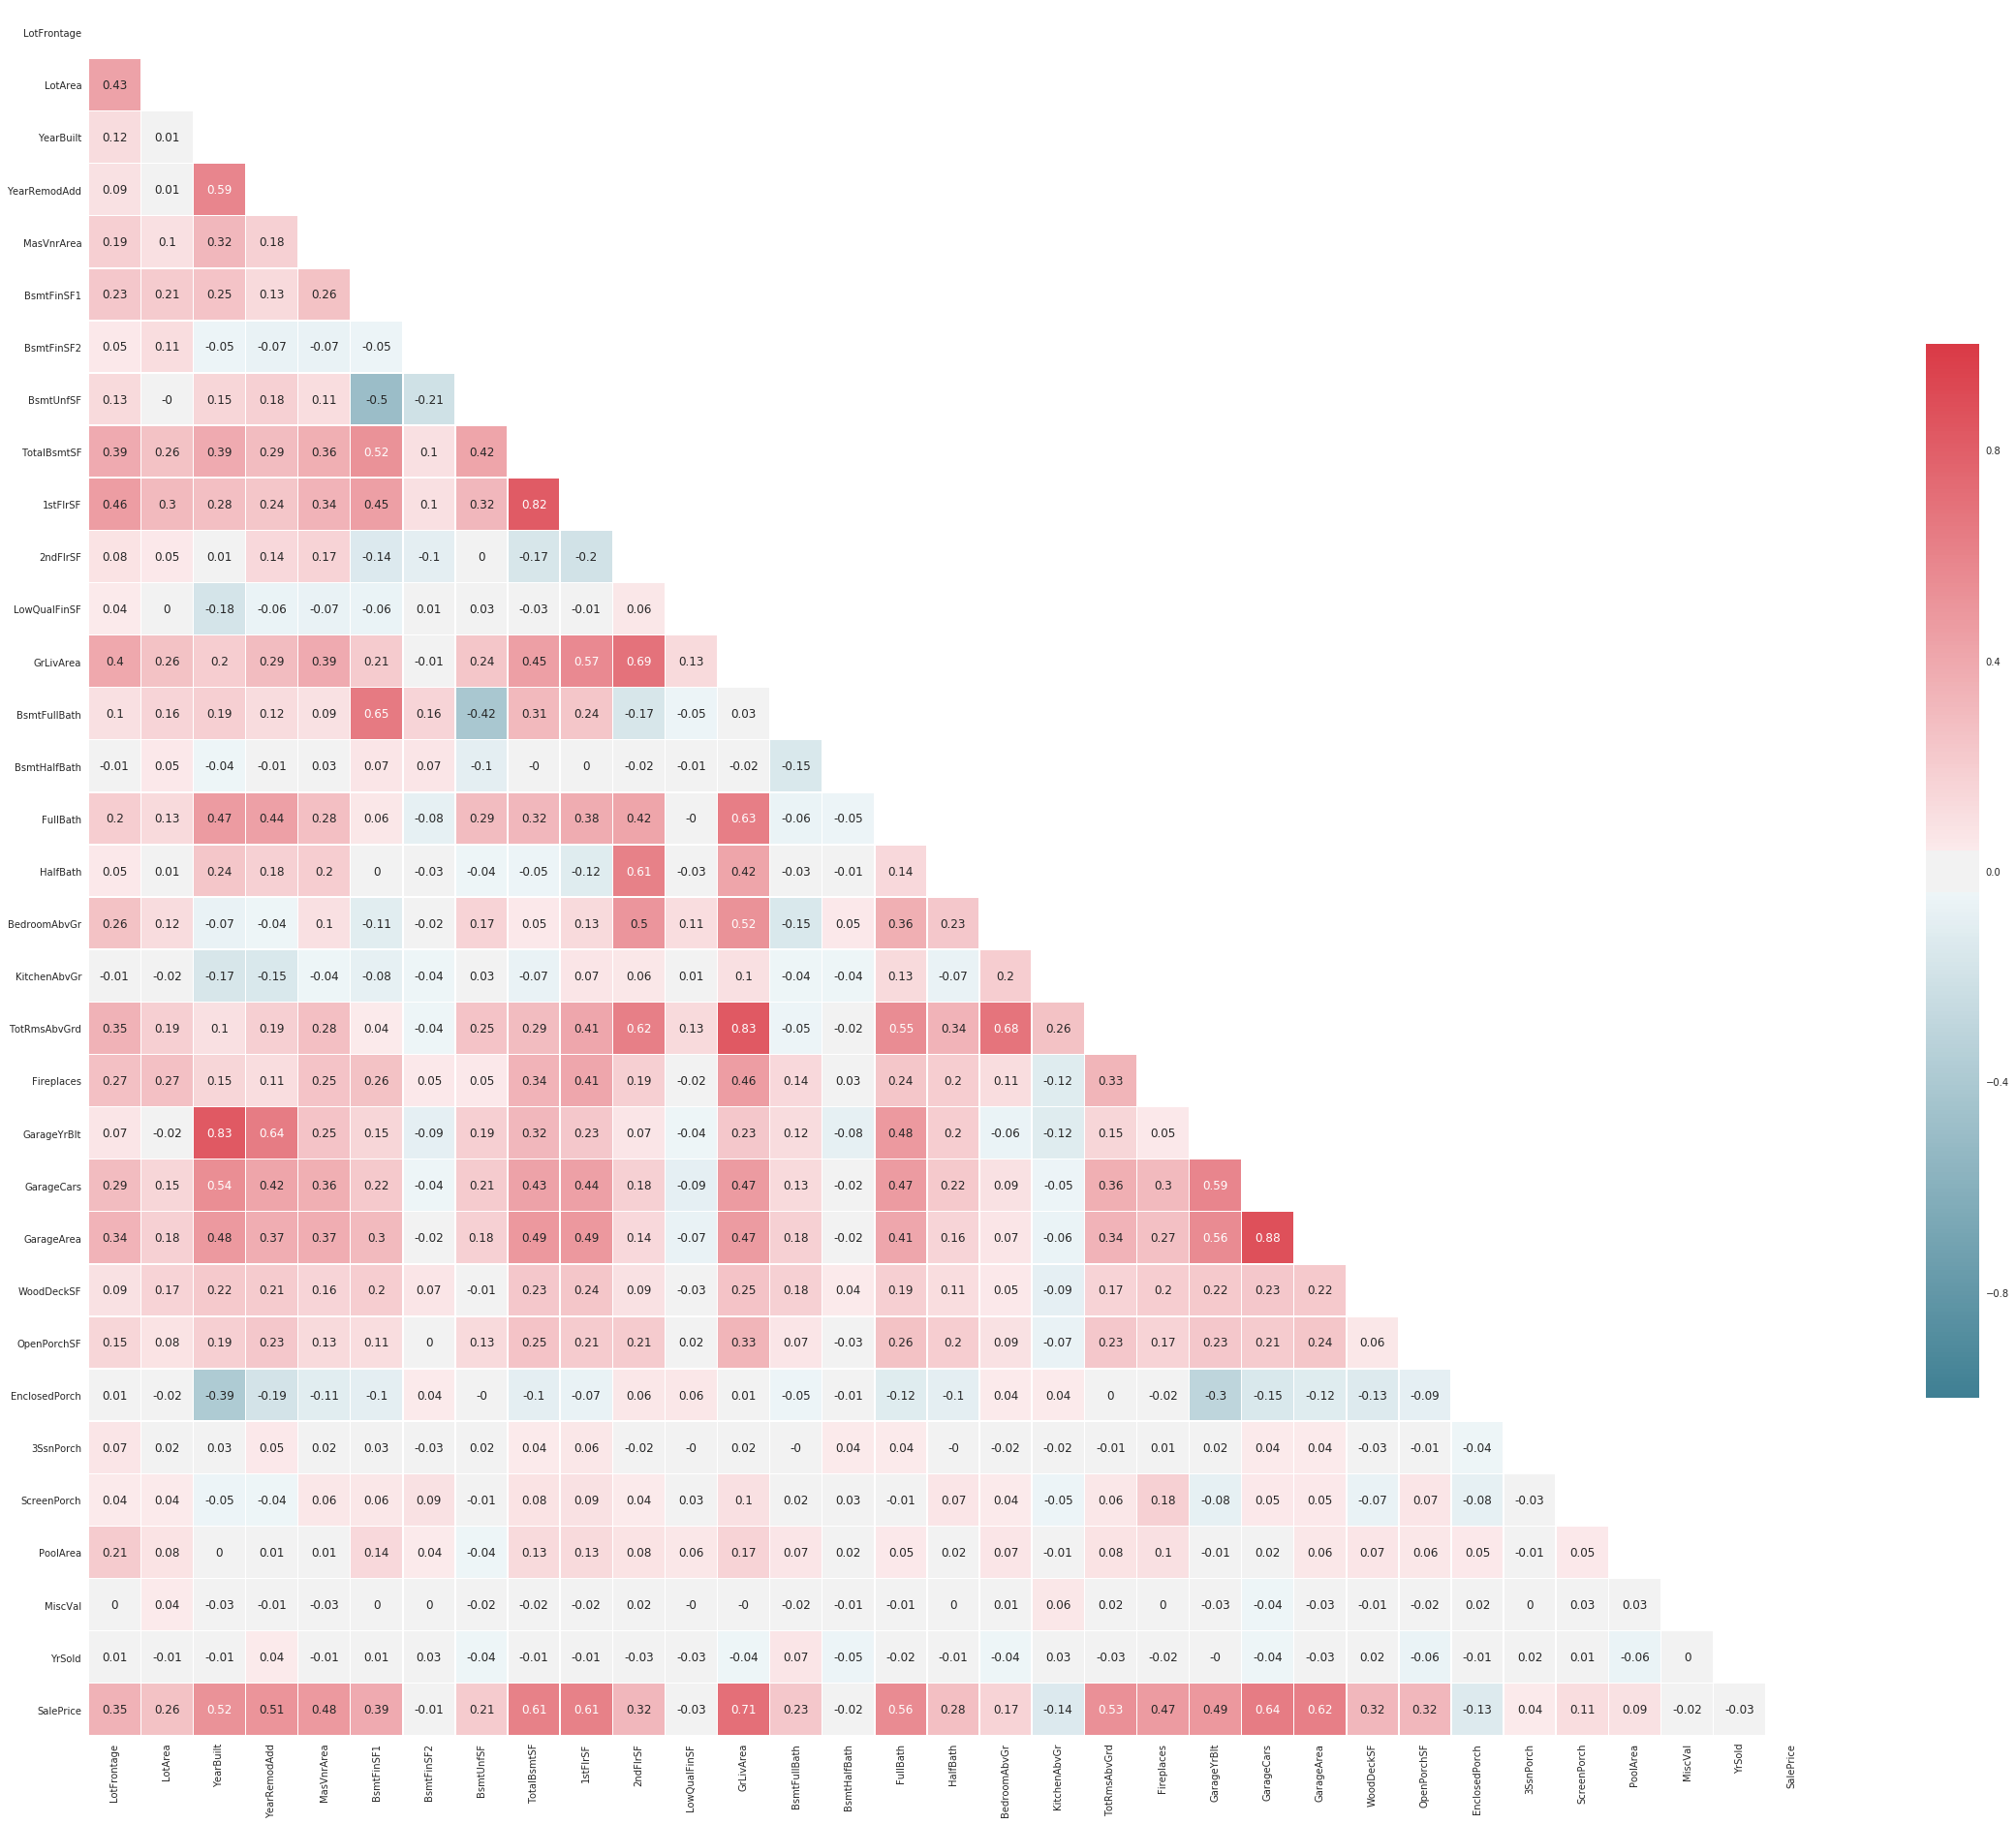

In [192]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = df[continuous_features].corr().round(2)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

plt.show()

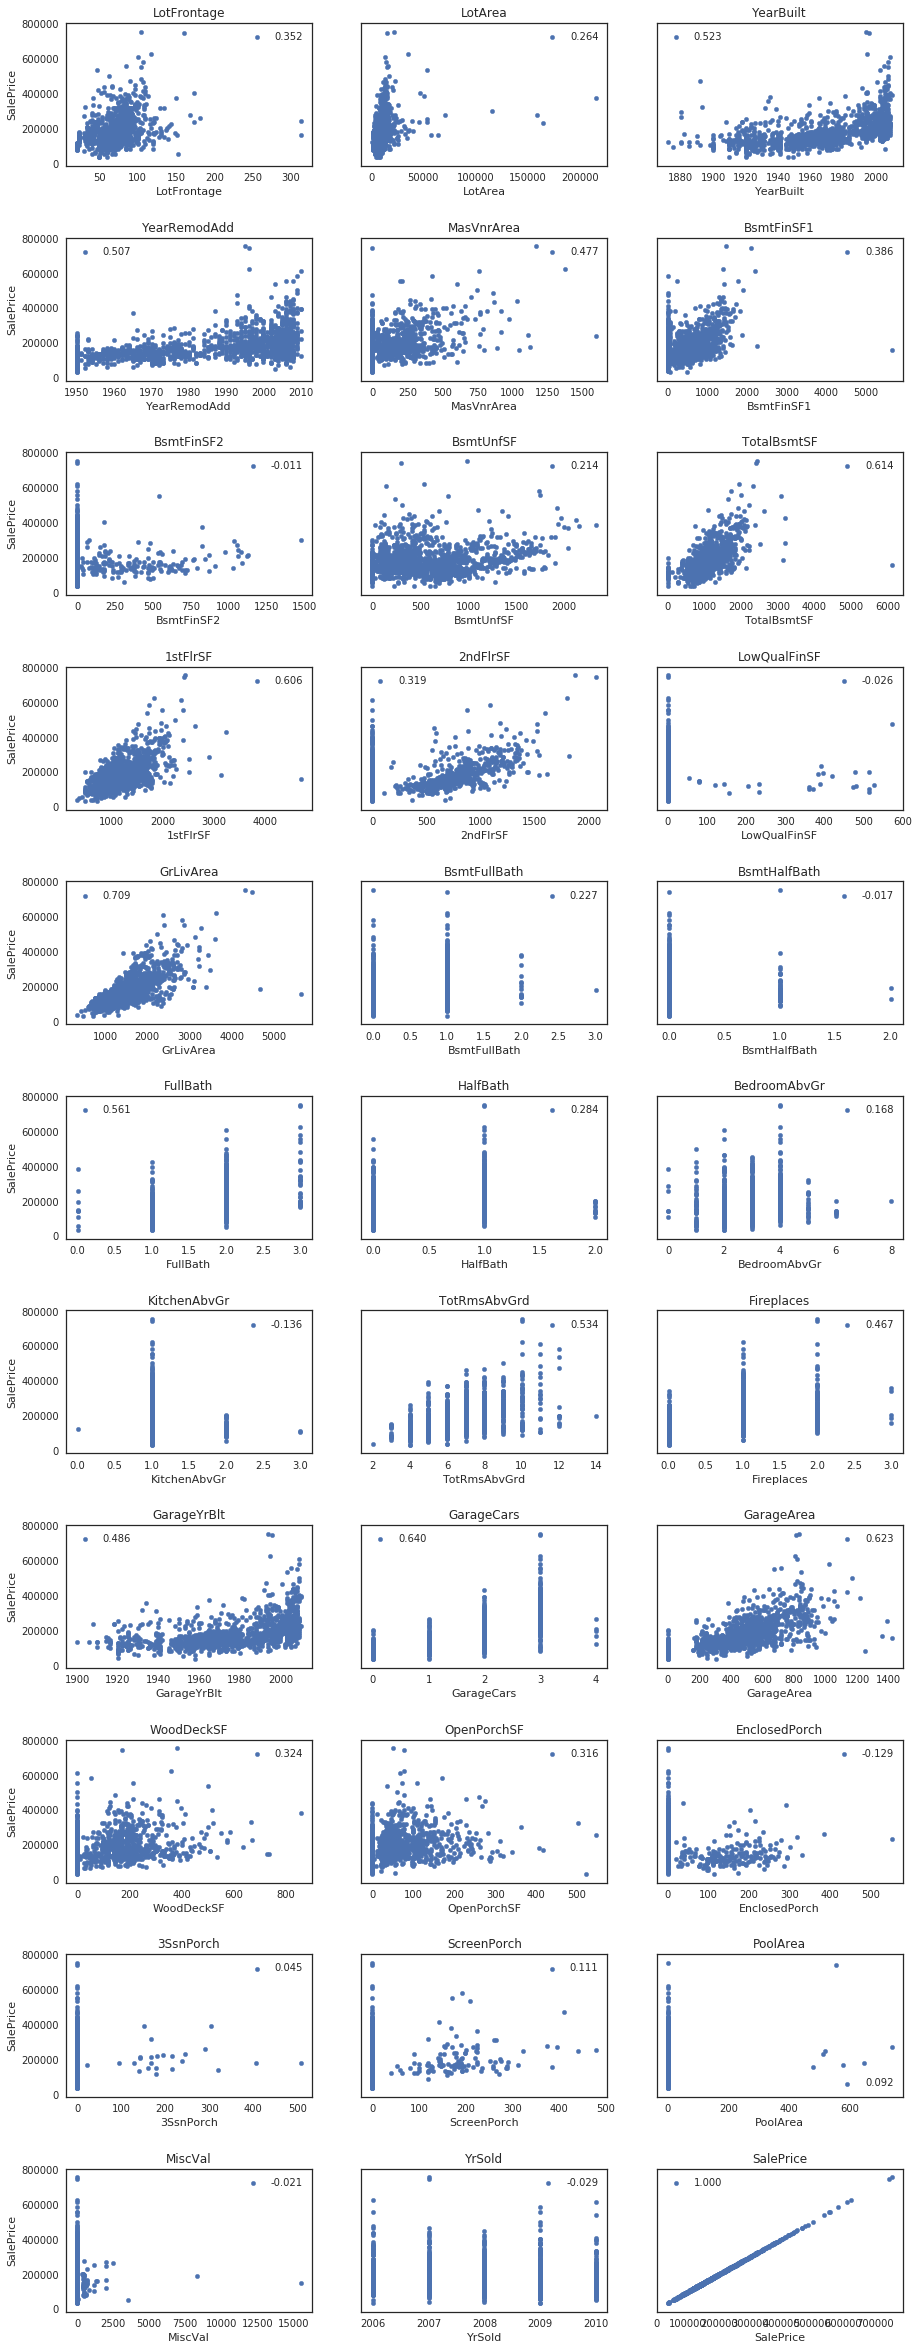

In [193]:
# Correlation of continuous variables with SalePrice, plotted.

fig, axes = plt.subplots(nrows=13, ncols=3, sharey=True, figsize=(15, 50))
fig.subplots_adjust(hspace = 0.5)

axes_list = [item for sublist in axes for item in sublist]

for feature in continuous_features:
    ax = axes_list.pop(0)
    
    df.plot(kind='scatter', x=feature, y='SalePrice', 
            label="%.3f" % df[[feature, 'SalePrice']].corr().as_matrix()[0,1], title=feature, ax=ax)

for ax in axes_list:
    ax.remove()  
    
plt.show()

In [194]:
df.to_csv('CleanedTrain.csv',index=False)

In [195]:
df_test =  pd.read_csv('test.csv')
df_test = df_test.drop(dropNaN,axis=1)
#df_test = df_test.drop('Id',axis=1)
df_test.to_csv('CleanedTest.csv',index=False)

# 4 - Training The Models

# Linear Model - Isaac

In [196]:
df = pd.read_csv('CleanedTrainWithNulls.csv')
print(df.shape)
df.head(3)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Data Preparation

In [197]:
# Convert features of type 'object' to type 'category'
for column in df.select_dtypes(['object']).columns:
    df[column] = df[column].astype('category')

# Make list of categorical columns
categorical_features = df.select_dtypes(['category']).columns.tolist()
categorical_features.extend(['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond'])

In [198]:
# Double check that the lists of continuous and categorical features contain all features in dataframe.
print("Total number of features: ", len(df.columns))
print("Number of continuous: ", len(continuous_features))
print("Number of categorical: ", len(categorical_features))
print("Continuous + Categorical:", len(continuous_features) + len(categorical_features))

Total number of features:  80
Number of continuous:  33
Number of categorical:  47
Continuous + Categorical: 80


In [199]:
# Ordinal Categorical Features

ordinal = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 
           'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
           'OverallQual', 'OverallCond', 'PavedDrive']

# Binary Features

dummy = ['CentralAir']

# Concated dummy to ordinal

ordinal = ordinal + dummy

In [200]:
# Unique values in ordinal
print("\nOrdinal features unique values:")
print("-"*100)

for column in ordinal:
    try:
        print("{0:20} {1}".format(column, pd.unique(df[column].ravel())))
    except:
        continue


Ordinal features unique values:
----------------------------------------------------------------------------------------------------
LotShape             ['Reg' 'IR1' 'IR2' 'IR3']
Utilities            ['AllPub' 'NoSeWa']
LandSlope            ['Gtl' 'Mod' 'Sev']
ExterQual            ['Gd' 'TA' 'Ex' 'Fa']
ExterCond            ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual             ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond             ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure         ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1         ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2         ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC            ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Electrical           ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
KitchenQual          ['Gd' 'TA' 'Ex' 'Fa']
Functional           ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
FireplaceQu          [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish         ['RFn' 'Unf' 'Fin' nan]
GarageQual           ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Garag

In [201]:
# Change NaN values to 0.

HasNaN = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
          'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

for feature in HasNaN:
    try:
        df[feature] = df[feature].replace(np.nan, 0)
    except:
        print("Error: ", feature)
        continue
        

In [202]:
# Create Ordinal Mappings: https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

# ******************************************************************************************************

# Reg = Regular	
# IR1 = Slightly irregular
# IR2 = Moderately Irregular
# IR3 = Irregular

LotShape = ['IR3', 'IR2', 'IR1', 'Reg']

# ******************************************************************************************************

# AllPub = All public Utilities (E,G,W,& S)
# NoSewr = Electricity, Gas, and Water (Septic Tank)
# NoSeWa = Electricity and Gas Only
# ELO = Electricity only

Utilities = ['NoSeWa', 'AllPub']

# ******************************************************************************************************

# Gtl = Gentle slope
# Mod = Moderate Slope
# Sev = Severe Slope

LandSlope = ['Gtl', 'Mod', 'Sev']

# ******************************************************************************************************

# Ex = Excellent
# Gd = Good
# TA = Average/Typical
# Fa = Fair
# Po = Poor

KitchenQual = ['Fa', 'TA', 'Gd', 'Ex']
ExterQual = ['Fa', 'TA', 'Gd', 'Ex']
ExterCond = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
HeatingQC = ['Po', 'Fa', 'TA', 'Gd', 'Ex']


# ******************************************************************************************************

# As above with additional category
# NA = Feature isn't present in house.

BsmtQual = [0, 'Fa', 'TA', 'Gd', 'Ex']
BsmtCond = [0, 'Po', 'Fa', 'TA', 'Gd']
GarageQual = [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageCond = [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu = [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex']
PoolQC = [0, 'Fa', 'Gd', 'Ex']

# ******************************************************************************************************

# Gd = Good Exposure
# Av = Average Exposure (split levels or foyers typically score average or above)	
# Mn = Mimimum Exposure
# No = No Exposure
# NA = No Basement

BsmtExposure = [0, 'No', 'Mn', 'Av', 'Gd']

# ******************************************************************************************************

# Typ = Typical Functionality
# Min1 = Minor Deductions 1
# Min2 = Minor Deductions 2
# Mod = Moderate Deductions
# Maj1 = Major Deductions 1
# Maj2 = Major Deductions 2
# Sev = Severely Damaged
# Sal = Salvage only

Functional = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']

# ******************************************************************************************************

# GLQ = Good Living Quarters
# ALQ = Average Living Quarters
# BLQ = Below Average Living Quarters	
# Rec = Average Rec Room
# LwQ = Low Quality
# Unf = Unfinshed
# NA = No Basement

BsmtFinType1 = [0, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtFinType2 = [0, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']

# ******************************************************************************************************

# Fin = Finished 
# RFn = Rough Finished 
# Unf = Unfinished 
# NA = No Garage

GarageFinish = [0, 'Unf', 'RFn', 'Fin']

# ******************************************************************************************************

# GdPrv = Good Privacy 
# MnPrv = Minimum Privacy 
# GdWo = Good Wood 
# MnWw = Minimum Wood/Wire 
# NA =  No Fence

Fence = [0, 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

# ******************************************************************************************************

# SBrkr = Standard Circuit Breakers & Romex
# FuseA = Fuse Box over 60 AMP and all Romex wiring (Average)	
# FuseF = 60 AMP Fuse Box and mostly Romex wiring (Fair)
# FuseP = 60 AMP Fuse Box and mostly knob & tube wiring (poor)
# Mix = Mixed

Electrical = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']

# ******************************************************************************************************

# Y = Paved 
# P = Partial Pavement
# N = Dirt/Gravel

PavedDrive = ['N', 'P', 'Y']

# ******************************************************************************************************

CentralAir = ['N', 'Y']

# ******************************************************************************************************

# Already mapped to ints.

OverallQual = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OverallCond = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# *****************************************************************************************************

In [203]:
# Mapping relationship between featuers and their ordered category lists.

mapping = {'LotShape': LotShape, 'Utilities': Utilities, 'LandSlope': LandSlope, 'ExterQual': ExterQual, 
           'ExterCond': ExterCond, 'BsmtQual': BsmtQual, 'BsmtCond': BsmtCond, 'BsmtExposure': BsmtExposure, 
           'BsmtFinType1': BsmtFinType1, 'BsmtFinType2': BsmtFinType2, 'HeatingQC': HeatingQC, 
           'Electrical': Electrical, 'KitchenQual': KitchenQual, 'Functional': Functional, 
           'FireplaceQu': FireplaceQu, 'GarageFinish': GarageFinish, 'GarageQual': GarageQual, 
           'GarageCond': GarageCond, 'PoolQC': PoolQC, 'Fence': Fence, 'OverallQual': OverallQual, 
           'OverallCond': OverallCond, 'PavedDrive': PavedDrive, 'CentralAir': CentralAir}

In [204]:
# Change categorical values in ordinal into ints using maps defined above.

for feature in ordinal:
    try:
        df[feature] = df[feature].astype(object).astype("category", ordered=True, categories=mapping[feature]).cat.codes
    except:
        print("Error converting", feature, "to category codes.")
        continue


In [205]:
# Unique values in ordinal
print("\nOrdinal features unique values:")
print("-"*100)

for column in ordinal:
    try:
        print("{0:20} {1}".format(column, pd.unique(df[column].ravel())))
    except:
        continue


Ordinal features unique values:
----------------------------------------------------------------------------------------------------
LotShape             [3 2 1 0]
Utilities            [1 0]
LandSlope            [0 1 2]
ExterQual            [2 1 3 0]
ExterCond            [2 3 1 0 4]
BsmtQual             [3 2 4 0 1]
BsmtCond             [3 4 0 2 1]
BsmtExposure         [1 4 2 3 0]
BsmtFinType1         [6 5 1 3 4 0 2]
BsmtFinType2         [1 4 0 5 3 2 6]
HeatingQC            [4 3 2 1 0]
Electrical           [ 4  2  3  1  0 -1]
KitchenQual          [2 1 3 0]
Functional           [6 5 2 4 3 1 0]
FireplaceQu          [0 3 4 2 5 1]
GarageFinish         [2 1 3 0]
GarageQual           [3 2 4 0 5 1]
GarageCond           [3 2 0 4 1 5]
PoolQC               [0 3 1 2]
Fence                [0 3 2 4 1]
OverallQual          [6 5 7 4 8 3 9 2 0 1]
OverallCond          [4 7 5 6 3 1 2 8 0]
PavedDrive           [2 0 1]
CentralAir           [1 0]


### Nominal Categorical

In [206]:
# Create dummy variables for nominal categorical features
nominal = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Condition1', 'Condition2', 
           'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
           'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

In [207]:
# Convert MSSubClass to type category (it's currently int):
df['MSSubClass'] = df['MSSubClass'].astype('category')

In [208]:
df[nominal].head(5)

,MSSubClass,MSZoning,Street,Alley,LandContour,LotConfig,Condition1,Condition2,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,GarageType,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Lvl,Inside,Norm,Norm,CollgCr,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,NaN,WD,Normal
1,20,RL,Pave,NaN,Lvl,FR2,Feedr,Norm,Veenker,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Attchd,NaN,WD,Normal
2,60,RL,Pave,NaN,Lvl,Inside,Norm,Norm,CollgCr,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,NaN,WD,Normal
3,70,RL,Pave,NaN,Lvl,Corner,Norm,Norm,Crawfor,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Detchd,NaN,WD,Abnorml
4,60,RL,Pave,NaN,Lvl,FR2,Norm,Norm,NoRidge,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,NaN,WD,Normal


In [209]:
# Get dummy variables for nominal features
dummies = pd.get_dummies(df[nominal], drop_first=True)

In [210]:
# Concat dummies to dataframe
df = pd.concat([df, dummies], axis=1)

## Feature Selection for Linear Regression

### Correlations
#### Continuous Features

In [211]:
# Correlation of continuous features, displayed in table format

df[continuous_features].corr().loc[:,'SalePrice':].T

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
SalePrice,0.351799,0.263843,0.522897,0.507101,0.477493,0.38642,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.486362,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.02119,-0.028923,1.0


#### Categorical Features

In [212]:
# Correlation of continuous features, displayed in table format

df[categorical_features+['SalePrice']].corr().loc[:,'SalePrice':].T

,LotShape,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,OverallQual,OverallCond,SalePrice
SalePrice,-0.267759,0.014314,0.051152,0.682639,0.018899,0.622925,0.212607,0.374696,0.304908,-0.005323,0.427649,0.251328,0.223563,0.6596,0.107619,0.520438,0.549247,0.273839,0.263191,0.231357,0.11968,-0.146942,0.046432,0.790982,-0.077856,1.0


#### All features

In [213]:
df_correlations = df.corr().loc[:,'SalePrice':'SalePrice']
df_correlations.T

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SalePrice,0.351799,0.263843,-0.267759,0.014314,0.051152,0.790982,-0.077856,0.522897,0.507101,0.477493,0.682639,0.018899,0.622925,0.212607,0.374696,0.304908,0.38642,-0.005323,-0.011378,0.214479,0.613581,0.427649,0.251328,0.223563,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.6596,0.533723,0.107619,0.466929,0.520438,0.486362,0.549247,0.640409,0.623431,0.273839,0.263191,0.231357,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,0.11968,-0.146942,-0.02119,0.046432,-0.028923,1.0,-0.23864,-0.016366,-0.082912,-0.156692,0.377197,-0.036883,0.015265,-0.028646,-0.049137,-0.114655,0.062944,-0.113042,-0.082215,-0.093578,0.08995,-0.065429,0.245063,-0.288065,0.041036,-0.027655,0.120014,0.045528,-

In [214]:
df_correlations = df_correlations.sort_values(by=['SalePrice'], ascending=False)

In [215]:
# Top 20 best positive correlations, descending
df_correlations.head(20).T

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,FireplaceQu,YearRemodAdd,Foundation_PConc,GarageYrBlt,MasVnrArea,Fireplaces
SalePrice,1.0,0.790982,0.708624,0.682639,0.6596,0.640409,0.623431,0.622925,0.613581,0.605852,0.560664,0.549247,0.533723,0.522897,0.520438,0.507101,0.497734,0.486362,0.477493,0.466929


In [216]:
# Top 20 best negative correlations, ascending
df_correlations.tail(20).T

,Neighborhood_BrkSide,Fence,SaleCondition_Normal,MSSubClass_50,Exterior1st_Wd Sdng,Exterior2nd_Wd Sdng,Exterior2nd_MetalSd,Neighborhood_IDOTRR,Exterior1st_MetalSd,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,RoofStyle_Gable,MSSubClass_30,SaleType_WD,LotShape,MSZoning_RM,Foundation_CBlock,GarageType_Detchd,MasVnrType_None
SalePrice,-0.143648,-0.146942,-0.15399,-0.156692,-0.158619,-0.1618,-0.162389,-0.164056,-0.167068,-0.179949,-0.188513,-0.192189,-0.224744,-0.23864,-0.242598,-0.267759,-0.288065,-0.343263,-0.354141,-0.374468


### Location

I have a hunch that location may be a significant factor in the price, but that it simply may be split into too many groups.

In [217]:
neighbourhoods = ['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 
                  'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 
                  'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 
                  'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 
                  'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 
                  'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']

In [218]:
neighbourhood_cors = df[neighbourhoods+['SalePrice']].corr().loc[:,'SalePrice':]

In [219]:
neighbourhood_cors = neighbourhood_cors.sort_values(by=['SalePrice'], ascending=False)

In [220]:
neighbourhood_cors.T

,SalePrice,Neighborhood_NridgHt,Neighborhood_NoRidge,Neighborhood_StoneBr,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Veenker,Neighborhood_ClearCr,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_SawyerW,Neighborhood_Blueste,Neighborhood_NPkVill,Neighborhood_Mitchel,Neighborhood_SWISU,Neighborhood_BrDale,Neighborhood_MeadowV,Neighborhood_Sawyer,Neighborhood_BrkSide,Neighborhood_IDOTRR,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown
SalePrice,1.0,0.402149,0.330424,0.215363,0.140058,0.126236,0.072626,0.07116,0.063471,0.055718,0.03594,0.023483,0.01456,-0.02025,-0.03791,-0.057845,-0.063705,-0.101303,-0.112544,-0.128394,-0.143648,-0.164056,-0.179949,-0.188513,-0.192189


Solution? Change neighbourhood into an ordinal variable ordered by highest correlationwith SalePrice (most expensive neighbourhood, to lowest (cheapest neighbourhood).

In [221]:
neighbourhood_ranking = ['NridgHt', 'NoRidge', 'StoneBr', 'Somerst', 'Timber', 'CollgCr', 'Crawfor', 
                         'Veenker', 'ClearCr', 'Gilbert', 'NWAmes', 'SawyerW', 'Blueste', 'NPkVill', 'Mitchel', 
                         'SWISU', 'BrDale', 'MeadowV', 'Sawyer', 'BrkSide', 'IDOTRR', 'Edwards', 'NAmes', 'OldTown']

In [222]:
df['Neighborhood'] = df['Neighborhood'].astype(object).astype("category", ordered=True, categories=neighbourhood_ranking).cat.codes

In [223]:
df['Neighborhood'].head(5)

0    5
1    7
2    5
3    6
4    1
Name: Neighborhood, dtype: int8

In [224]:
# It seems my hunch was correct!
df[['Neighborhood', 'SalePrice']].corr()

,Neighborhood,SalePrice
Neighborhood,1.000000,-0.640296
SalePrice,-0.640296,1.000000


### Examine Interesting Features Further

In [225]:
variables = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'FullBath',
             'GarageCars', '1stFlrSF', 'YearBuilt', 'Neighborhood']

In [226]:
# Check for multicollinearity
df[variables].corr()

,OverallQual,GrLivArea,ExterQual,KitchenQual,FullBath,GarageCars,1stFlrSF,YearBuilt,Neighborhood
OverallQual,1.000000,0.593007,0.726278,0.673331,0.550600,0.600671,0.476224,0.572323,-0.657338
GrLivArea,0.593007,1.000000,0.435986,0.420563,0.630012,0.467247,0.566024,0.199010,-0.367872
ExterQual,0.726278,0.435986,1.000000,0.716122,0.483949,0.526390,0.397835,0.598160,-0.644633
KitchenQual,0.673331,0.420563,0.716122,1.000000,0.434648,0.509810,0.387027,0.530165,-0.563837
FullBath,0.550600,0.630012,0.483949,0.434648,1.000000,0.469672,0.380637,0.468271,-0.528426
GarageCars,0.600671,0.467247,0.526390,0.509810,0.469672,1.000000,0.439317,0.537850,-0.535873
1stFlrSF,0.476224,0.566024,0.397835,0.387027,0.380637,0.439317,1.000000,0.281986,-0.306303
YearBuilt,0.572323,0.199010,0.598160,0.530165,0.468271,0.537850,0.281986,1.000000,-0.706889
Neighborhood,-0.657338,-0.367872,-0.644633,-0.563837,-0.528426,-0.535873,-0.306303,-0.706889,1.000000


The following features seem strongly correlated and may present multicollinearity issues.
```
OverallQual ~ ExterQual
KitchenQual ~ ExterQual
OverallQual ~ KitchenQual
YearBuilt ~ Neighborhood 	
```
It may be prudent to leave out KitchenQual, ExterQual and YearBuilt

### Selected Features

In [227]:
# Statsmodel doesn't like numbers at the start of feature names.
df.rename(columns = {'1stFlrSF':'FirstFlrSF'}, inplace = True)

In [228]:
explanatory_variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'FirstFlrSF', 'Neighborhood']
explanatory_variables_str = """OverallQual + GrLivArea + GarageCars + FirstFlrSF + Neighborhood"""

### Split dataset into train and test

In [229]:
y = df['SalePrice']
X = df[explanatory_variables]

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [231]:
df_train = pd.concat([X_train, y_train], axis=1)

## Linear Regression Model

In [232]:
df_train.reset_index(drop=True, inplace=True)

In [233]:
df_train.tail(5)

,OverallQual,GrLivArea,GarageCars,FullBath,FirstFlrSF,Neighborhood,SalePrice
1163,5,1114,2,1,1114,11,155000
1164,6,1501,2,2,1501,5,204000
1165,7,1652,2,2,1652,2,251000
1166,6,2646,3,2,1372,1,260000
1167,4,1265,2,2,1265,22,179900


In [234]:
# Regress handsetAge and callMinutesChangePct on churn
linearModel = sm.ols(formula="SalePrice ~ "+explanatory_variables_str, data=df_train).fit()

In [235]:
print(linearModel.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     786.7
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        09:41:49   Log-Likelihood:                -13936.
No. Observations:                1168   AIC:                         2.788e+04
Df Residuals:                    1162   BIC:                         2.791e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -1.3e+04   7341.658     -1.770   

## Model Performance

In [236]:
#X_test.reset_index(drop=True, inplace=True)
X_test.head(5)

,OverallQual,GrLivArea,GarageCars,FullBath,FirstFlrSF,Neighborhood
932,8,1905,3,2,1905,3
409,7,2078,3,2,1050,3
1271,5,1489,2,2,1489,10
270,7,1939,3,2,1095,3
1290,4,1152,2,1,1152,22


In [237]:
y_test.head(5)

932     320000
409     339750
1271    185750
270     266000
1290    180500
Name: SalePrice, dtype: int64

In [238]:
y_pred = linearModel.predict(X_test)

In [239]:
y_pred.head(5)

932     311851.267950
409     270734.060372
1271    196604.476410
270     266843.226217
1290    128543.228543
dtype: float64

In [240]:
y_test.reset_index(drop=True, inplace=True)
y_pred.reset_index(drop=True, inplace=True)

In [241]:
#Evaluate the linear model.
absError = abs(y_test-y_pred)
percentError = abs(y_test-y_pred) / y_test
print(pd.DataFrame({'Actual SalePrice': y_test, 'Predicted SalePrice': y_pred, 'Absolute Error' : absError, '% Error': percentError}).head(10))
print("============================================================================================")

    % Error  Absolute Error  Actual SalePrice  Predicted SalePrice
0  0.025465     8148.732050            320000        311851.267950
1  0.203137    69015.939628            339750        270734.060372
2  0.058436    10854.476410            185750        196604.476410
3  0.003170      843.226217            266000        266843.226217
4  0.287849    51956.771457            180500        128543.228543
5  0.111147    21006.727785            189000        210006.727785
6  0.337328    60718.960277            180000        240718.960277
7  0.073215    17029.833884            232600        249629.833884
8  0.098797    16201.734210            163990        180191.734210
9  0.321545    53775.255836            167240        221015.255836


In [242]:
y_test_pred = pd.concat([y_test, y_pred], axis=1)
y_test_pred.columns = ['Actual', 'Predicted']
y_test_pred.head(5)

,Actual,Predicted
0,320000,311851.267950
1,339750,270734.060372
2,185750,196604.476410
3,266000,266843.226217
4,180500,128543.228543


In [243]:
chartData = y_test_pred.sort_values('Predicted')

In [244]:
chartData.reset_index(drop=True, inplace=True)

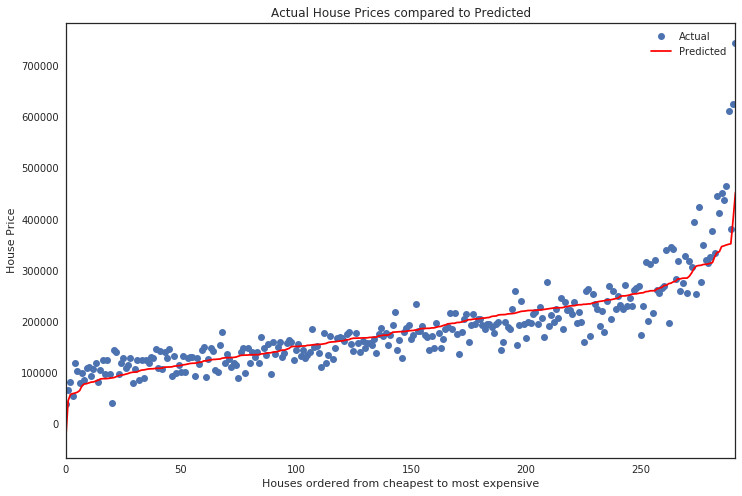

In [245]:
fig, ax = plt.subplots(figsize=(12, 8))

chartData.plot(x=chartData.index, y='Actual', linestyle="", marker="o", ax=ax, label="Actual")
chartData.plot(x=chartData.index, y='Predicted', c='red', ax=ax, label="Predicted")

ax.set_title('Actual House Prices compared to Predicted')
ax.set_xlabel('Houses ordered from cheapest to most expensive')
ax.set_ylabel('House Price')
ax.legend(numpoints = 1)

plt.show()

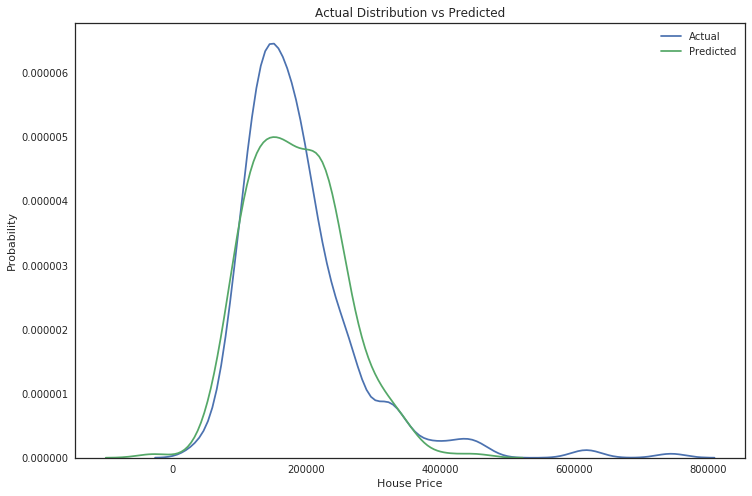

In [246]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.distplot(chartData.Actual, hist=False, ax=ax, label="Actual")
sns.distplot(chartData.Predicted, hist=False, ax=ax, label="Predicted")

ax.set_title('Actual Distribution vs Predicted')
ax.set_xlabel('House Price')
ax.set_ylabel('Probability')

plt.show()

# Random Forest - Xinyue

In [247]:
# Imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.feature_selection import RFE

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [248]:
# train file read in
df_randomForest = pd.read_csv('CleanedTrain.csv')

In [249]:
df_randomForest.shape

(1460, 75)

<b> Select Features:</b><br>
I read <a href='http://blog.datadive.net/selecting-good-features-part-iii-random-forests/'>something about selecting features</a> online gives me these ideas:<br>
- feature selection based on impurity reduction is biased towards preferring variables with more categories.
- when the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others.
<br>The second one inspired me to check to correlation of dataset and drop those really correlated columns, which potentially provides duplicate informations.

In [250]:
def dropCorColumns(dataframe,threshold=0.8):
    '''Take a dataframe, get dummies, calculate correlation between all the combination, drop one of the column in 
    high correlation pairs.'''
    dataframe_dummies = pd.get_dummies(dataframe,drop_first=True)
    correlations = []
    columns = dataframe_dummies.columns.tolist()

    for col_a, col_b in itertools.combinations(columns, 2):
        correlations.append([col_a, col_b, dataframe_dummies[col_a].corr(dataframe_dummies[col_b])])

    result = [i for i in correlations if i[2]>=threshold]
        #result = DataFrame.from_dict(correlations, orient='index')
    #result.columns = ['PCC', 'p-value']

    #print(result)
    dropList = [i[0] for i in result]
    df = dataframe_dummies.drop(dataframe_dummies[dropList],axis=1)
    return df

<b>Missing Values:</b>

In [251]:
hasNullValues = []
for f in df_randomForest.columns:
    if df_randomForest[f].isnull().sum() > 0:
        hasNullValues.append(f)
        #print(f,"Missing:",df_randomForest[f].isnull().sum())
        print("{0:15} Missing: {1:3}".format(f, df_randomForest[f].isnull().sum()))

LotFrontage     Missing: 259
MasVnrType      Missing:   8
MasVnrArea      Missing:   8
BsmtQual        Missing:  37
BsmtCond        Missing:  37
BsmtExposure    Missing:  38
BsmtFinType1    Missing:  37
BsmtFinType2    Missing:  38
Electrical      Missing:   1
GarageType      Missing:  81
GarageYrBlt     Missing:  81
GarageFinish    Missing:  81
GarageQual      Missing:  81
GarageCond      Missing:  81


These missing values is quite annoying...my basic idea is to either impute or drop rows.

# Experiment 1: Imputation with most frequently values

In [252]:
#df_randomForest[df_randomForest.isnull().any(axis=1)]

In [253]:
#df_randomForest.describe().T

In [254]:
#categorical_features=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold', 'OverallQual', 'OverallCond']

In [255]:
# Code from:https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

<b>Impute nan value with mean, categorical features have string which can not be impute properly. Here's some hack from stackoverflow, works perfectly.

In [256]:
df_randomForest_imp = DataFrameImputer().fit_transform(df_randomForest)
#imp.fit(df_randomForest[categorical_features])
#df_randomForest[categorical_features].isnull().sum()
isnull = [ i for i in df_randomForest_imp.columns if df_randomForest_imp[i].isnull().sum() != 0]
print(isnull)
df_randomForest_imp.shape

[]


(1460, 75)

<b>Based on steps I need to take on training models and prediction, I wrote a function to play around. It will do things below:<br>
- Change all the features to dummies, drop one of the dummies of every category
- Take a column name and save that as a target label, drop it and save the rest as features.
- Split training and test set, by default, it's 0.7.
- Standardize the dataset.
- Train the dataset with random forest model, by default oob=True, treeNumber=500.
- Print evaluations. Including: feature importance, oob score, mse, mae, r2, explained variance score and accuracy.

In [257]:
def randomForesty(dataframe,targetColumn,trainSize=0.7,treeNumber=500,oob=True,randomState=47):
    '''Take a raw dataframe, produce dummies, separate target and feature sets, do model training, testing '''
    
    #Get dummies
    dataframe_dummies = pd.get_dummies(dataframe,drop_first=True)
    
    #Separate target and feature set.
    target = dataframe_dummies[targetColumn]
    features = dataframe_dummies.drop(targetColumn,axis=1)
    
    #Train, test set separation
    X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=trainSize, random_state=randomState)
    
    #Standardization
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)
    
    #Foresty
    rf = RandomForestRegressor(n_estimators=treeNumber, oob_score=oob, random_state=randomState)
    rf.fit(X_train, y_train)
    
    #Prediction
    #print('\n','-'*20,'Prediction','-'*20)
    predicted_train = rf.predict(X_train)
    predicted_test = rf.predict(X_test)
    #print("Prediction of Train set:",predicted_train,"\nPrediction of Test set:",predicted_test)
    
#    return rf,predicted_train,predicted_test

#def evaluation(rf, predicted_train, predicted_test):
    '''Take a random forest model and evaluation(mean_squared_error, mean_absolute_error, explained_variance_score, 
    accuracy and r2_score) in one go. '''
    #Feature importance
    print('\n','-'*20,'Feature Importances','-'*20,'\n')
    print(pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_}).sort_values(by=['importance'],ascending=False).head(10))
    
    #OOB
    print('\n','-'*20,'OOB','-'*20,'\n')
    print("OOB Score:                       ",rf.oob_score_)
    
    #MSE
    #print("{0:15} Missing: {1:3}".format(f, df_randomForest[f].isnull().sum()))
    print('\n','-'*20,'MSE','-'*20,'\n')
    #print("Training set: {0:10}".format(metrics.mean_squared_error(y_train, predicted_train)))
    print("Training set:                    ",metrics.mean_squared_error(y_train, predicted_train))
    print("Test set:                        ",metrics.mean_squared_error(y_test, predicted_test))
    
    #MAE
    print('\n','-'*20,'MAE','-'*20,'\n')
    trainMean = y_train.mean()
    testMean = y_test.mean()
    print("Training set dummy result (mean):",trainMean,"\nTest set dummy result (mean):    ",testMean)
    
    print("Training set:")
    baseline_errors = abs(trainMean - y_train)
    print('Average baseline error:          ', round(np.mean(baseline_errors), 2))

    rf_errors = abs(predicted_train - y_train)
    print('Mean Absolute Error:             ', round(np.mean(rf_errors), 2))
    
    print("Test set:")
    # Baseline errors, and display average baseline error
    baseline_errors = abs(testMean - y_test)
    print('Average baseline error:          ', round(np.mean(baseline_errors), 2))

    rf_errors = abs(predicted_test - y_test)
    print('Mean Absolute Error:             ', round(np.mean(rf_errors), 2))
    
    #R2
    print('\n','-'*20,'R-Squared','-'*20,'\n')
    train_score = metrics.r2_score(y_train, predicted_train)
    print("Traning set R2 score:            ",train_score)
    test_score = metrics.r2_score(y_test, predicted_test)
    print("Test set R2 score:               ",test_score)
    
    #Explained variance score
    print('\n','-'*20,'Explained Variance Score','-'*20,'\n')
    print("EVS of training set:             ",metrics.explained_variance_score(y_train, predicted_train))
    print("EVS of test set:                 ",metrics.explained_variance_score(y_test, predicted_test))
    
    #Accuracy
    print('\n','-'*20,'Accuracy','-'*20,'\n')
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (rf_errors / y_test)

    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:                         ', round(accuracy, 2), '%.')
    #[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [258]:
randomForesty(df_randomForest_imp,'SalePrice')

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)



 -------------------- Feature Importances -------------------- 

        feature  importance
3   OverallQual    0.560367
15    GrLivArea    0.154650
11  TotalBsmtSF    0.033275
8    BsmtFinSF1    0.028228
18     FullBath    0.025425
13     2ndFlrSF    0.019507
26   GarageArea    0.016544
12     1stFlrSF    0.015930
2       LotArea    0.014303
5     YearBuilt    0.011752

 -------------------- OOB -------------------- 

OOB Score:                        0.884874799902

 -------------------- MSE -------------------- 

Training set:                     96671783.6877
Test set:                         1589199139.99

 -------------------- MAE -------------------- 

Training set dummy result (mean): 181420.80215475024 
Test set dummy result (mean):     179759.24145785876
Training set:
Average baseline error:           57133.01
Mean Absolute Error:              6239.5
Test set:
Average baseline error:           58124.24
Mean Absolute Error:              19843.56

 -------------------- R-Squar

<b>[Discussion]<br>
By the result shown above, the most outstanding feature is <font color='green'>OverallQual</font>.<br>Quite decent OOB score and accuracy.<br>
    The only thing I'm not really happy about is the R-squared dropped from 0.98(training set) to 0.75 (test set).

# Experiment 2: Drop NaN rows

In [259]:
df_randomForest_drop = df_randomForest.dropna()
df_randomForest_drop.shape

(1094, 75)

In [260]:
randomForesty(df_randomForest_drop,'SalePrice')

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)



 -------------------- Feature Importances -------------------- 

          feature  importance
3     OverallQual    0.597635
15      GrLivArea    0.100093
12       1stFlrSF    0.027518
18       FullBath    0.023509
11    TotalBsmtSF    0.022115
8      BsmtFinSF1    0.020722
13       2ndFlrSF    0.020390
26     GarageArea    0.016389
2         LotArea    0.014822
143  ExterQual_Gd    0.013922

 -------------------- OOB -------------------- 

OOB Score:                        0.851930644997

 -------------------- MSE -------------------- 

Training set:                     134870742.502
Test set:                         1561218854.43

 -------------------- MAE -------------------- 

Training set dummy result (mean): 186805.0522875817 
Test set dummy result (mean):     187563.90577507598
Training set:
Average baseline error:           59886.9
Mean Absolute Error:              6683.26
Test set:
Average baseline error:           61845.68
Mean Absolute Error:              21032.43

 -------

<b>[Discussion]<br>
    By comparing the evaluation above, I tend to pick the drop version. The main reason is like mentioned above, I don't like the quick drop of r-squared from training set to test set, which maked me doubt that my imputation skewed the dataset too much.
    <br>Also, the accuracy raised a little bit...<br>
    Thirdly, the feature importance seems more distinguishing...

# Experiment 3: Imputation + drop corr columns

As mentioned above, correlated columns could influence random forest to make decision. If two columns contains similar information, there is no need to maintain it. Try to drop one.

In [261]:
df_randomForest_noCorr = dropCorColumns(df_randomForest_imp)

In [262]:
df_randomForest_noCorr.shape

(1460, 221)

In [263]:
randomForesty(df_randomForest_noCorr,'SalePrice')

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)



 -------------------- Feature Importances -------------------- 

         feature  importance
3    OverallQual    0.600763
15      FullBath    0.070393
11      1stFlrSF    0.042736
8     BsmtFinSF1    0.035932
22    GarageArea    0.034294
2        LotArea    0.032007
7     MasVnrArea    0.016526
19  TotRmsAbvGrd    0.014203
1    LotFrontage    0.011811
20    Fireplaces    0.011500

 -------------------- OOB -------------------- 

OOB Score:                        0.853895719966

 -------------------- MSE -------------------- 

Training set:                     121463736.117
Test set:                         1447086000.28

 -------------------- MAE -------------------- 

Training set dummy result (mean): 181420.80215475024 
Test set dummy result (mean):     179759.24145785876
Training set:
Average baseline error:           57133.01
Mean Absolute Error:              6758.41
Test set:
Average baseline error:           58124.24
Mean Absolute Error:              21051.1

 -----------------

<b>[Discussion]<br>
    The OverallQual feature is more outstanding now, but I'm still not very happy about the drop of R-squared.

# Experiment 4: drop NaN + drop corr columns

In [264]:
df_randomForest_noCorrNaN = dropCorColumns(df_randomForest_drop)

In [265]:
randomForesty(df_randomForest_noCorrNaN,'SalePrice')

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)



 -------------------- Feature Importances -------------------- 

          feature  importance
3     OverallQual    0.618238
10       1stFlrSF    0.038444
14       FullBath    0.037561
21     GarageArea    0.035667
2         LotArea    0.030045
7      BsmtFinSF1    0.029106
6      MasVnrArea    0.023866
18   TotRmsAbvGrd    0.021657
131  ExterQual_Gd    0.021259
1     LotFrontage    0.011790

 -------------------- OOB -------------------- 

OOB Score:                        0.832170666176

 -------------------- MSE -------------------- 

Training set:                     152599352.76
Test set:                         1880055359.36

 -------------------- MAE -------------------- 

Training set dummy result (mean): 186805.0522875817 
Test set dummy result (mean):     187563.90577507598
Training set:
Average baseline error:           59886.9
Mean Absolute Error:              7261.61
Test set:
Average baseline error:           61845.68
Mean Absolute Error:              22435.22

 --------

<b>[Discussion]<br>
    Very interesting, all the other feature's importance dropped and OverallQual becomes very outstanding. I'm really curious to try how the performance will be alone.

# Experiment 5: OverallQual on its own (just for fun)

In [266]:
randomForesty(df_randomForest[['OverallQual','SalePrice']],'SalePrice')

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)



 -------------------- Feature Importances -------------------- 

       feature  importance
0  OverallQual         1.0

 -------------------- OOB -------------------- 

OOB Score:                        0.687021034146

 -------------------- MSE -------------------- 

Training set:                     1873300307.71
Test set:                         2334506927.81

 -------------------- MAE -------------------- 

Training set dummy result (mean): 181420.80215475024 
Test set dummy result (mean):     179759.24145785876
Training set:
Average baseline error:           57133.01
Mean Absolute Error:              30306.13
Test set:
Average baseline error:           58124.24
Mean Absolute Error:              32056.47

 -------------------- R-Squared -------------------- 

Traning set R2 score:             0.700149158273
Test set R2 score:                0.637661304033

 -------------------- Explained Variance Score -------------------- 

EVS of training set:              0.700149516258
EVS of t

# For kaggle submission

## can't drop NaN in test set...

In [267]:
df_randomForest_test = pd.read_csv('CleanedTest.csv')
#print(df_randomForest_test.shape)
df_randomForest_test = DataFrameImputer().fit_transform(df_randomForest_test)
df_randomForest_test = pd.get_dummies(df_randomForest_test,drop_first=True)
#df_randomForest_test[df_randomForest_test.isnull().any(axis=1)].shape
#df_randomForest_test.shape
df_randomForest_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,

In [268]:
# The test set lack of some columns in training set...Try to impute columns with 0...
impList = pd.get_dummies(df_randomForest_imp,drop_first=True).columns.tolist()
testDontHave = [x for x in impList if x not in df_randomForest_test.columns.tolist()]
testDontHave.remove('SalePrice')
#print(testDontHave)
for x in testDontHave:
    df_randomForest_test[x] = pd.Series(np.zeros(df_randomForest_test.shape[0]))#, index=df1.index
#df_randomForest_test.head()
df_randomForest_id = df_randomForest_test['Id']
df_randomForest_test = df_randomForest_test.drop('Id',axis=1)

In [269]:
# Train with df_randomForest_drop 'SalePrice'
def prediction(df_train,label,df_test,treeNumber=500,oob=True,randomState=47):
    '''Use a df to predict the other set. Return a df of predict result.'''
    
    df_dummies = pd.get_dummies(df_train,drop_first=True)
    #print(df_dummies.shape)
    #Separate target and feature set.
    target = df_dummies[label]
    features = df_dummies.drop(label,axis=1)

    #Standardization
    scaler = StandardScaler().fit(features)
    X_scaled = pd.DataFrame(scaler.transform(features), index=features.index.values, columns=features.columns.values)
    #X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

    #Foresty
    rf = RandomForestRegressor(n_estimators=treeNumber, oob_score=oob, random_state=randomState)
    rf.fit(X_scaled, target)

    #Prediction
    #print('\n','-'*20,'Prediction','-'*20)
    predicted = rf.predict(df_test)
    return predicted

In [270]:
result = pd.DataFrame(prediction(df_randomForest_imp,'SalePrice',df_randomForest_test),columns=['SalePrice'])

In [271]:
result['Id'] = df_randomForest_id

In [272]:
result.head()

,SalePrice,Id
0,407353.720,1461
1,396212.524,1462
2,586967.138,1463
3,599032.496,1464
4,400547.856,1465


In [273]:
result.to_csv('impute.csv',index=False)

![My score](Screenshot from 2018-04-20 10-26-44.png)

References:<br>
<a>http://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/</a><br>
<a>https://towardsdatascience.com/random-forest-in-python-24d0893d51c0</a><br>
<a>http://scikit-learn.org/stable/modules/model_evaluation.html</a>
<a>http://blog.datadive.net/selecting-good-features-part-iii-random-forests/</a>
<a>https://stackoverflow.com/questions/33997753/calculating-pairwise-correlation-among-all-columns</a>

# Decision Tree - Ernest

Below is the original cleaned data.

In [274]:
df = pd.read_csv('CleanedTrain.csv')
print(df.shape)
df.head(3)

(1460, 75)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


Below I'll perform the following additional **<font color="orange">transformations</font>** to the data:
- **Missing - NaN** data: **<font color="orange">Drop affected rows</font>**.
- **Categorical** data: use **<font color="orange">One-Hot encoding</font>** to convert categorical features to numeric. **<font color="orange">Drop the first column</font>** to prevent overly strong correlation between the encoded columns in the category.

In [275]:
from sklearn import tree
import graphviz
import datetime

#Prepare Data. 
df = pd.read_csv('CleanedTrain.csv')

#Drop rows which have any missing values in any of the columns
df = df.dropna(how='any')

#Dealing with categorical data: convert categorical features to numeric using One-Hot encoding.
df = pd.get_dummies(df, drop_first=True)

print(df.shape)
df.head(3)

(1094, 222)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,

In [276]:
#shuffle the rows
df = df.sample(frac=1)

#Normalize [if needed]
#df = (df-df.min())/(df.max()-df.min())

#create a data split for training and testing: 70% train, 30% test.
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df.SalePrice, test_size=0.3, random_state=0)

#Train/fit the model
myTree = tree.DecisionTreeRegressor(min_samples_leaf=50,
                                    min_samples_split=50,
                                    max_depth=6,
                                    random_state=0)
myTree.fit(X_train, y_train)

#Evaluate the Decision Tree model using the hold-out 30% test set.
predictions = myTree.predict(X_test)
absError = abs(y_test-predictions)
percentError = abs(y_test-predictions) / y_test
print(pd.DataFrame({'Actual SalePrice': y_test, 'Predicted SalePrice': predictions, 'Absolute Error' : absError, '% Error': percentError}).head(10))
print("============================================================================================")

#Perform 10 fold ross evaluation.
scores = cross_val_score(myTree, df.drop('SalePrice', axis=1), df.SalePrice, scoring='r2', cv=10)
print("Sumary of scores:")
print("\nList of r^2: \n", scores)
print("\nAverage of r^2 scores: \n",scores.mean())
print("\nThe exaplined variance: \n",explained_variance_score(y_test, predictions))
print("============================================================================================")

#Create a graph representation
graph = graphviz.Source(tree.export_graphviz(myTree, out_file=None))
#Print to pdf, append a date to the name of the plot to uniquelly identify the plot.
print("The plot can be found in the following location:")
graph.render('decisionTreeOutputGraphs/dTOG'+datetime.datetime.now().strftime("_%I:%M:%S_%B_%d_%Y"), view=True)

#To plot a graph below, uncomment the following line:
#graph

       % Error  Absolute Error  Actual SalePrice  Predicted SalePrice
1307  0.047386     6539.215686            138000        131460.784314
469   0.047584     8898.266667            187000        178101.733333
515   0.098051    39500.945455            402861        363360.054545
637   0.595909    55419.531250             93000        148419.531250
61    0.001686      170.315789            101000        101170.315789
1198  0.005005      890.888889            178000        178890.888889
747   0.067064    17837.692308            265979        248141.307692
889   0.007227     1080.468750            149500        148419.531250
329   0.297055    23170.315789             78000        101170.315789
605   0.210445    43141.307692            205000        248141.307692
Sumary of scores:

List of r^2: 
 [ 0.76088513  0.72082528  0.58698967  0.79614999  0.69542483  0.61688644
  0.7800854   0.72111611  0.70968808  0.80962008]

Average of r^2 scores: 
 0.719767102404

The exaplined variance: 
 0.730

'decisionTreeOutputGraphs/dTOG_09:43:19_April_23_2018.pdf'

### Quality of the model:

- We can see from sample plot of 10 rows that the absolute error percentage is pretty low, hovering at about 10%. Sometimes it jumps up to 30% or even 150% though.
- Both the $r^2$ and the variance have the score of about 0.7. The higher the score the better, thus the model is pretty good at predicting test data.

### Looking at the output graph, the following features seem to stand out:

- These columns are roughly in order of importance, from most important **OverallQual** to least important **GarageFinish_RFn**. 
- The most important columns are likely to be higher to the root of the tree, the least important are further from the root.
- **OverallQual** is invariably the root.

In [277]:
print(df.columns[3]) #X[3]
print(df.columns[15]) #X[15]
print(df.columns[12]) #X[12]
print(df.columns[6]) #X[6]
print(df.columns[11]) #X[11]
print(df.columns[26]) #X[26]
print(df.columns[8]) #X[8]
print(df.columns[5]) #X[5]
print(df.columns[25]) #X[25]

OverallQual
GrLivArea
1stFlrSF
YearRemodAdd
TotalBsmtSF
GarageArea
BsmtFinSF1
YearBuilt
GarageCars


Interpreting the columns:
- **OverallQual**, which according to Kaggle description is *"Overall material and finish quality"*, is the strongest price indicator. One can think of this as a rough gauge of the quality of the house, based on how much was invested in making it as nice as possible.
- **YearRemodAdd**, which according to Kaggle description is the *"Remodel date"*, has a pretty prominent position in the tree. One could think this as a simple indicator of how new/updated/modern the house is.
- **YearBuilt**, which according to Kaggle description is the *"Original construction date"*, is of some significance too. It's less important than **YearRemodAdd**, probably because even if the house was built a long time ago, a recent refurbishment can compensate for this and make the house "new".
- **GrLivArea, 1stFlrSF, TotalBsmtSF, GarageArea, BsmtFinSF1, GarageCars** - these are all measure of <font color="green">area</font> or <font color="green">size</font> indicating that, as expected when it comes to cost of property, it's fairly linearly proportional to how big the property is.

# MLPClassifier (ANN) - Yiming